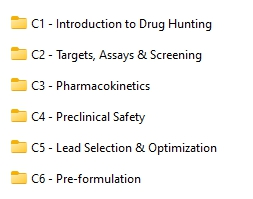

Tuyệt vời! Từ ảnh bạn gửi, mình thấy bạn có thư mục gốc chứa các thư mục con như:

```
Goc/
├── C1 - Introduction to Drug Hunting/
├── C2 - Targets, Assays & Screening/
├── C3 - Pharmacokinetics/
├── C4 - Preclinical Safety/
├── C5 - Lead Selection & Optimization/
├── C6 - Pre-formulation/
```

Bên trong mỗi folder đó chắc sẽ có các thư mục con như `Lesson1`, `Lesson2`, rồi mới đến video `.mp4`.

---

### ✅ Dưới đây là phiên bản code đã **tối ưu cho đúng cấu trúc của bạn**, không cần đổi tên gì hết:

```python
import cv2
import os
import glob

def extract_frames(video_path, input_root, output_root, interval_sec=10):
    # Tính đường dẫn tương đối để giữ nguyên cấu trúc thư mục
    relative_path = os.path.relpath(video_path, input_root)
    relative_folder = os.path.splitext(relative_path)[0]  # Bỏ phần .mp4

    # Tạo folder đầu ra tương ứng
    output_folder = os.path.join(output_root, relative_folder)
    os.makedirs(output_folder, exist_ok=True)

    video_name = os.path.splitext(os.path.basename(video_path))[0]
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_interval = int(fps * interval_sec)

    frame_count = 0
    saved_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % frame_interval == 0:
            img_name = f"{video_name}_frame_{saved_count:06d}.jpg"
            output_path = os.path.join(output_folder, img_name)
            cv2.imwrite(output_path, frame)
            saved_count += 1

        frame_count += 1

    cap.release()
    print(f"✅ {saved_count} ảnh từ: {relative_path}")

def process_folder(input_root, output_root, interval_sec=10):
    # Tìm tất cả file .mp4 trong mọi folder con
    for video_file in glob.glob(os.path.join(input_root, "**", "*.mp4"), recursive=True):
        extract_frames(video_file, input_root, output_root, interval_sec)

# --- CẤU HÌNH ---
input_folder = "Goc"  # Đổi thành đường dẫn tới thư mục bạn chứa C1, C2, ...
output_folder = "output_images"  # Thư mục để lưu ảnh
os.makedirs(output_folder, exist_ok=True)

# --- CHẠY ---
process_folder(input_folder, output_folder, interval_sec=10)
```

---

### 📂 Ví dụ kết quả:

Nếu bạn có:

```
Goc/C1 - Introduction to Drug Hunting/Lesson1/video.mp4
```

Ảnh đầu ra sẽ được lưu vào:

```
output_images/C1 - Introduction to Drug Hunting/Lesson1/video_frame_000000.jpg
```

---

Bạn chỉ cần đặt đoạn script vào cùng cấp với thư mục `"Goc"`, hoặc điều chỉnh `input_folder` là đường dẫn tuyệt đối đến thư mục đó. Nếu bạn cần mình đóng gói thành file `.py` sẵn sàng chạy hoặc cần chạy trên máy không có Python, mình hỗ trợ luôn nha.